In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from turtle import title

pd.set_option('display.max_columns', None)

#### We will be using the files_for_lab/customer_churn.csv dataset to build a churn predictor.

**Instructions**


1. Load the dataset and explore the variables.

In [2]:
data=pd.read_csv('customer_churn.csv')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


2. We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.

In [3]:
data=pd.read_csv('customer_churn.csv', usecols=['tenure','SeniorCitizen','MonthlyCharges', 'Churn'])
display(data)
data.dtypes

,SeniorCitizen,tenure,MonthlyCharges,Churn
0,0,1,29.85,No
1,0,34,56.95,No
2,0,2,53.85,Yes
3,0,45,42.30,No
4,0,2,70.70,Yes
...,...,...,...,...
7038,0,24,84.80,No
7039,0,72,103.20,No
7040,0,11,29.60,No
7041,1,4,74.40,Yes


SeniorCitizen       int64
tenure              int64
MonthlyCharges    float64
Churn              object
dtype: object

In [4]:
# change seniorcitizen to categorial variable
data['SeniorCitizen'] = data['SeniorCitizen'].astype(object)
data.dtypes

SeniorCitizen      object
tenure              int64
MonthlyCharges    float64
Churn              object
dtype: object

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [6]:
display(data['tenure'].unique())
display(data['tenure'].value_counts())

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39])

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

In [7]:
display(data['Churn'].unique())
display(data['Churn'].value_counts())

array(['No', 'Yes'], dtype=object)

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [8]:
data['Churn'].replace({'Yes': 1, "No": 0},inplace=True)
data

,SeniorCitizen,tenure,MonthlyCharges,Churn
0,0,1,29.85,0
1,0,34,56.95,0
2,0,2,53.85,1
3,0,45,42.30,0
4,0,2,70.70,1
...,...,...,...,...
7038,0,24,84.80,0
7039,0,72,103.20,0
7040,0,11,29.60,0
7041,1,4,74.40,1


3. Split the Dataset into X ('tenure', 'SeniorCitizen', 'MonthlyCharges') and y ('Churn')

In [9]:
X = data.drop('Churn',axis = 1)
y = data['Churn']

4. Build the logistic regression model.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 
LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train, y_train)

LogisticRegression(random_state=0)

5. Evaluate the model.

In [11]:
pred = LR.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0])

array([[1165,  133],
       [ 250,  213]])

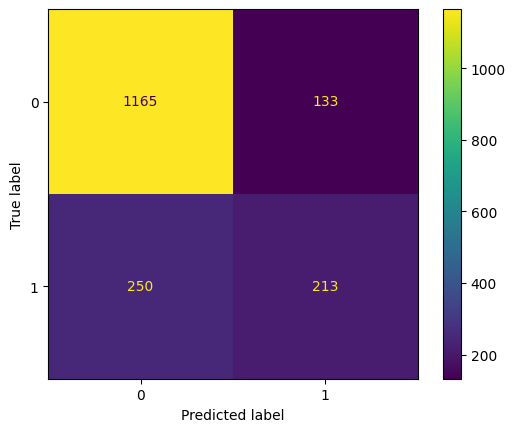

In [12]:
cm = confusion_matrix(y_test,pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LR.classes_)
cm_display.plot()

confusion_matrix(y_test,pred)

In [13]:
print("accuray: ",accuracy_score(y_test,pred))
print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

accuray:  0.7825099375354913
precision:  0.615606936416185
recall:  0.46004319654427644
f1:  0.526576019777503


6. Even a simple model will give us more than 70% accuracy. Why?

**Because the model is imbalanced, biased towards majority**

7. Synthetic Minority Oversampling Technique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [14]:
sm = SMOTE(random_state=100, k_neighbors=3)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train,y_train)
X_train_SMOTE.shape

(7752, 3)

In [15]:
# build model with smoted data 
LR_smote = LogisticRegression(random_state=0, solver='lbfgs')
LR_smote.fit(X_train_SMOTE, y_train_SMOTE)
pred_smote = LR_smote.predict(X_test)

print("accuray: ",accuracy_score(y_test,pred_smote))
print("precision: ",precision_score(y_test,pred_smote))
print("recall: ",recall_score(y_test,pred_smote))
print("f1: ",f1_score(y_test,pred_smote))

accuray:  0.7211811470755253
precision:  0.4797687861271676
recall:  0.7170626349892009
f1:  0.5748917748917749


array([[1165,  133],
       [ 250,  213]])

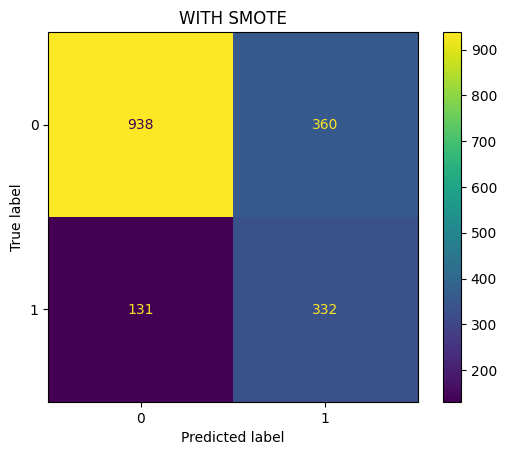

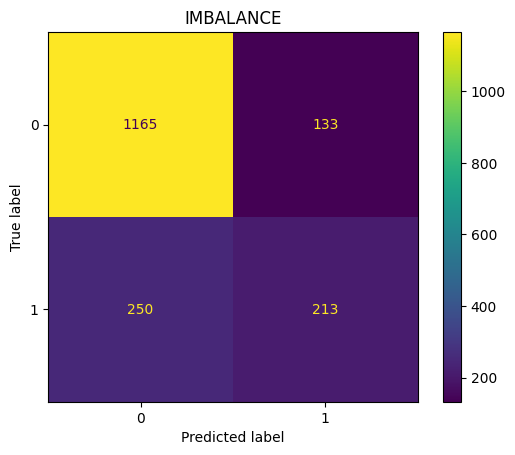

In [16]:
cm = confusion_matrix(y_test,pred_smote)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LR_smote.classes_)
cm_display.plot()
plt.title('WITH SMOTE')
confusion_matrix(y_test,pred)

cm = confusion_matrix(y_test,pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LR.classes_)
cm_display.plot()
plt.title('IMBALANCE')
confusion_matrix(y_test,pred)